In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [22]:
df_berlin = df[df["City"] == "Berlin"].copy()
df_berlin.shape


(3239, 7)

In [23]:
df_berlin["dt"] = pd.to_datetime(df_berlin["dt"], errors="coerce")
df_berlin["dt"].min(), df_berlin["dt"].max()


(Timestamp('1743-11-01 00:00:00'), Timestamp('2013-09-01 00:00:00'))

In [24]:
df_berlin = df_berlin[
    (df_berlin["dt"] >= "1953-01-01") &
    (df_berlin["dt"] <= "2013-12-31")
].copy()


In [25]:
df_berlin = df_berlin.dropna(subset=["AverageTemperature"]).copy()
df_berlin.shape


(728, 7)

In [26]:
df_berlin["year"] = df_berlin["dt"].dt.year

yearly = (
    df_berlin.groupby("year")["AverageTemperature"]
    .mean()
    .reset_index()
)

yearly.head()


,year,AverageTemperature
0,1953,10.132583
1,1954,8.414583
2,1955,8.359000
3,1956,7.572583
4,1957,9.461250


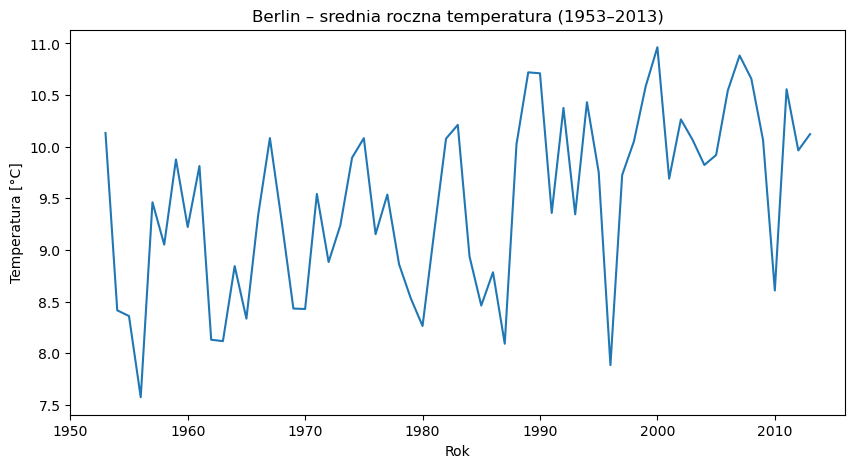

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(yearly["year"], yearly["AverageTemperature"])
plt.title("Berlin – srednia roczna temperatura (1953–2013)")
plt.xlabel("Rok")
plt.ylabel("Temperatura [°C]")
plt.show()


In [34]:
avg_53_73 = yearly[(yearly["year"] >= 1953) & (yearly["year"] <= 1973)]["AverageTemperature"].mean()
avg_94_13 = yearly[(yearly["year"] >= 1994) & (yearly["year"] <= 2013)]["AverageTemperature"].mean()

diff = avg_94_13 - avg_53_73

print(f"Srednia 1953–1973: {avg_53_73:.2f} °C")
print(f"Srednia 1994–2013: {avg_94_13:.2f} °C")
print(f"Roznica (ostatnie 20 lat - pierwsze 20 lat): {diff:.2f} °C")


Srednia 1953–1973: 8.98 °C
Srednia 1994–2013: 10.03 °C
Roznica (ostatnie 20 lat - pierwsze 20 lat): 1.05 °C


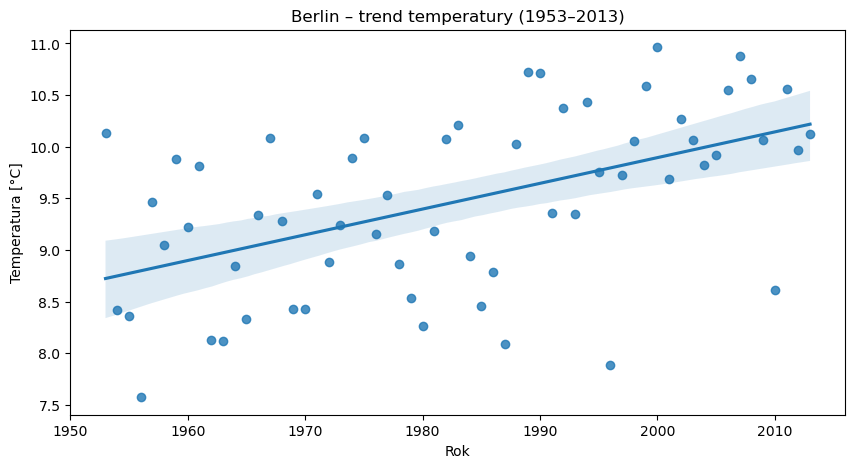

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.regplot(data=yearly, x="year", y="AverageTemperature")
plt.title("Berlin – trend temperatury (1953–2013)")
plt.xlabel("Rok")
plt.ylabel("Temperatura [°C]")
plt.show()


Na wykresie możemy zauważyc że średnia temperatura w Berlinie od 1953 od 2013 cały czas rośnie.

Dodatkowo można byłoby dołączyć: predkość i kierunek wiatru, wilgotność.